# Polynomial Interpolation – Exercise sheet 2

TMA4130/TMA4135 Høst 2023

## Lagrange interpolation

Remember how we can implement the cardinal functions and do the Lagrange interpolation:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

In [3]:
# THIS FUNCTION HAS TO BE COMPLETED CREATING THE CARDINAL FUNCTIONS
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))    # Array to store the product for l_i
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li *= (x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

In [4]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

# Problem 2
### c) Interpolate arbitrary functions with arbitrary interpolation points

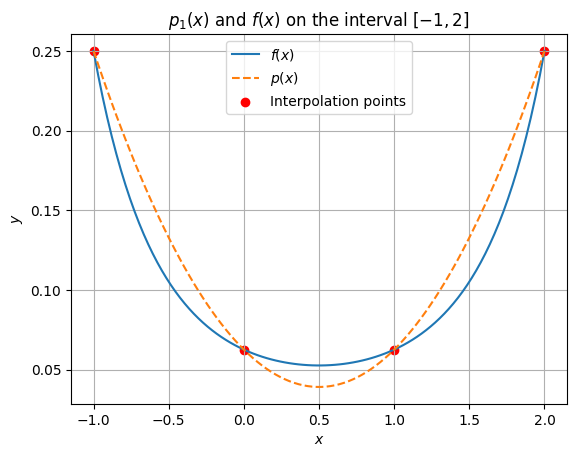

The maximum error on the interval [-1, 2] is:  0.03165919930512842
The maximum error on the interval [-5, 5] is:  67108863.75


In [7]:
def interpolate(xdata, f, x):
    """
    interpolate(xdata, f, x):
    In: xdata, array with the nodes x_i.
        f, function to be interpolated.
        x, array or a scalar of values in which the interpolation polynomial is evaluated.
    Return: P(x), the interpolation polynomial evaluated in x.
    """
    if(type(f) == np.ndarray):
        ydata = f
    else:
        ydata = f(xdata)          # y-values of the interpolation points
    l = cardinal(xdata, x)      # Cardinal functions evaluated at x
    y = lagrange(ydata, l)   # Interpolation polynomial evaluated at x
    return y


def f(x): # Function to be interpolated
    return np.power(2.0, x**2.0-x-4.0)

x_1 = np.linspace(-1, 2, 100) # Interval [-1, 2]

xdata = np.array([-1, 0, 1, 2]) # Interpolation points

p_1 = interpolate(xdata, f, x_1) # Interpolation polynomial

# Plotting
plt.plot(x_1, f(x_1), label='$f(x)$')
plt.plot(x_1, p_1, label='$p(x)$', linestyle='dashed')
plt.title('$p_1(x)$ and $f(x)$ on the interval $[-1, 2]$')
plt.scatter(xdata, f(xdata), label='Interpolation points', color='red')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

def error(f, p, x): # Function to calculate the maximum error
    return np.abs(f(x)-p)

x_2 = np.linspace(-5, 5, 100) # Interval [-5, 5]

print('The maximum error on the interval [-1, 2] is: ', np.max(error(f, p_1, x_1)))
print('The maximum error on the interval [-5, 5] is: ', np.max(error(f, p_1, x_2)))




### d) Calculate Chebyshev nodes for n = 3 on the interval [-1,2]

In [5]:
def chebyshev_nodes(n, interval):
    """
    chebyshev_nodes(n, interval):
    In: n, number of nodes.
        interval, the interval on which the nodes are defined.
    Return: An array with the Chebyshev nodes on the interval.
    """
    k_values = np.arange(0, n)
    z_k = np.cos(pi*(2*k_values+1)/(2*n)) # On the interval [-1, 1]
    a, b = interval
    x_k = (a+b)/2 + (b-a)/2*z_k # On the interval [a, b]
    return x_k

print('The Chebyshev nodes on the interval [-1, 2] with n = 3 are: ', chebyshev_nodes(3, [-1, 2]))

The Chebyshev nodes on the interval [-1, 2] with n = 3 are:  [ 1.79903811  0.5        -0.79903811]


### e) Plot the interpolation evaluated with Chebyshevs nodes for n = 3 on the interval [-1, 2]

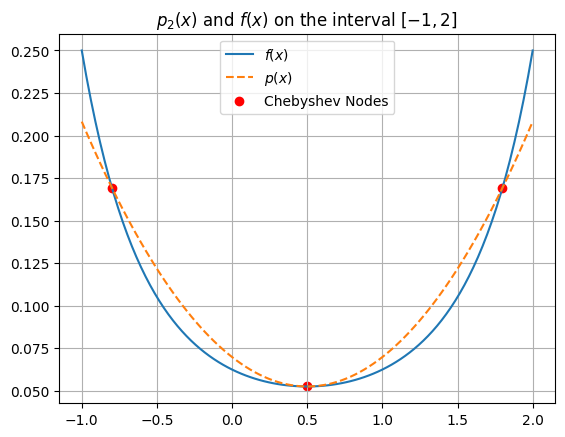

The maximum error on the interval [-1, 2] is:  0.04180941749497033
The maximum error on the interval [-5, 5] is:  67108863.79180942


In [6]:
n = 3 # Number of nodes
xdata = chebyshev_nodes(n, [-1, 2]) # Chebyshev nodes on the interval [-1, 2]
p_2 = interpolate(xdata, f, x_1) # Interpolation polynomial

# Plotting
plt.plot(x_1, f(x_1), label='$f(x)$')
plt.plot(x_1, p_2, label='$p(x)$', linestyle='dashed')
plt.title('$p_2(x)$ and $f(x)$ on the interval $[-1, 2]$')
plt.scatter(xdata, f(xdata), label='Chebyshev Nodes', color='red')
plt.legend()
plt.grid()
plt.show()

print('The maximum error on the interval [-1, 2] is: ', np.max(error(f, p_2, x_1)))
print('The maximum error on the interval [-5, 5] is: ', np.max(error(f, p_2, x_2)))

### f) Plot the errors as functions of x

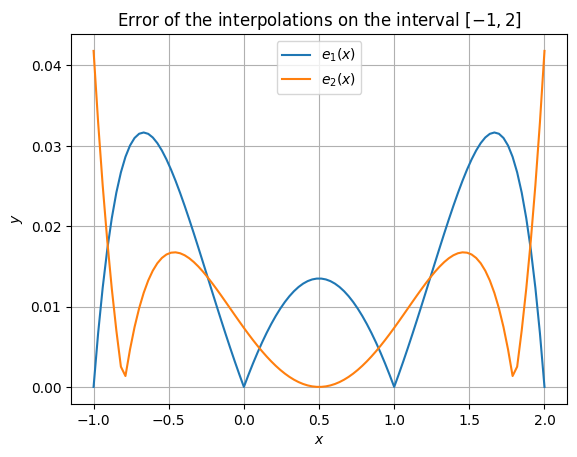

In [7]:
# Plotting the error on the interval [-1, 2] of the two interpolations

plt.plot(x_1, error(f, p_1, x_1), label='$e_1(x)$')
plt.plot(x_1, error(f, p_2, x_1), label='$e_2(x)$')
plt.title('Error of the interpolations on the interval $[-1, 2]$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()
# In this case the max error is greater for chebyshev nodes because n = 3 for p_2(x) (Using chebyshev nodes) and n = 4 for p_1(x)


# Problem 3
### a) Interpolating $x(t)$

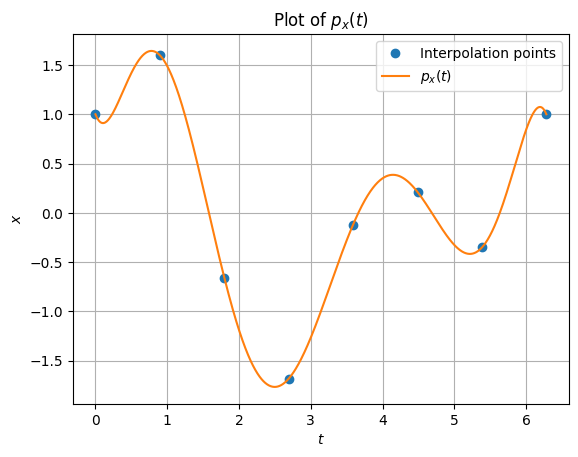

In [8]:
# Interpolation data
tdata = np.array([0, 0.8976, 1.7952, 2.6928, 3.5904, 4.4880, 5.3856, 6.2832])
xdata = np.array([1, 1.5984, -0.6564, -1.6828, -0.1191, 0.2114, -0.3514, 1])
    
# Grid points for plotting
t = np.linspace(0,tdata[-1],1000)

# Do the interpolation for the x coordinates here
# the final polynomial should be called
p_x = interpolate(tdata, xdata, t)

# and plot it here ...
plt.plot(tdata, xdata, 'o', label='Interpolation points')
plt.plot(t, p_x, label='$p_x(t)$')
plt.title('Plot of $p_x(t)$')
plt.ylabel('$x$')
plt.xlabel('$t$')
plt.legend()
plt.grid()
plt.show()

### b) Interpolating $y(t)$

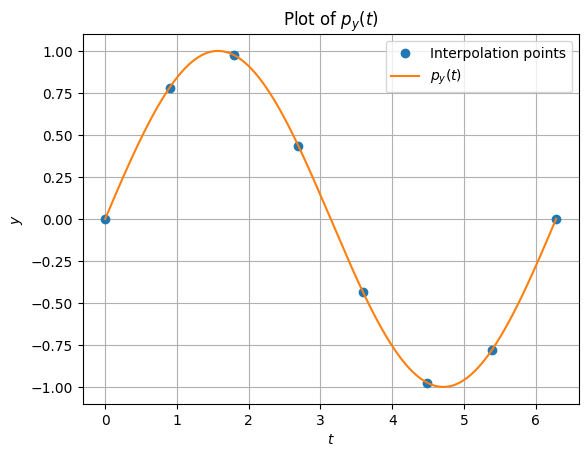

In [9]:
# Now do the same for the y coordinate...
ydata = np.array([0, 0.7818, 0.9750, 0.4339, -0.4339, -0.975, -0.7818, 0])

# the final polynomial should be called
p_y = interpolate(tdata, ydata, t)

# and plot it here ...
plt.plot(tdata, ydata, 'o', label='Interpolation points')
plt.plot(t, p_y, label='$p_y(t)$')
plt.title('Plot of $p_y(t)$')
plt.ylabel('$y$')
plt.xlabel('$t$')
plt.legend()
plt.grid()
plt.show()

#Hint: you can re-use the "li" already computed, since the cardinal functions depend only on tdata, not on xdata!

### c) Trajectory

The trajectory of a particle moving in $\mathbb{R}^2$ is the locus of all $(x,y)$ points traveled by the particle. Therefore, all we have to do is plot the interpolation of $x$ against the interpolation of $y$.

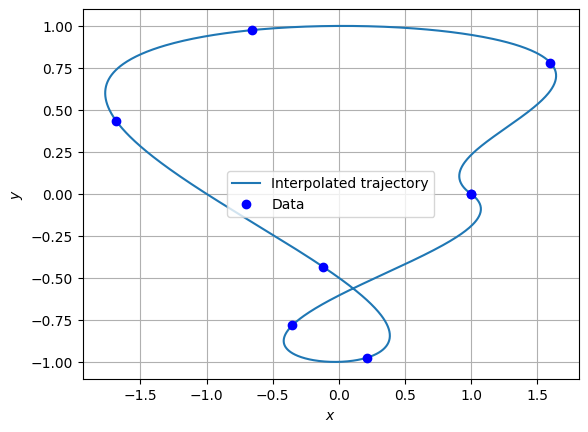

In [10]:

# If your polynomial in x is called px, Create your plot here
plt.plot(p_x, p_y, xdata, ydata,'ob')
plt.legend(['Interpolated trajectory', 'Data'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

### d) Find the exact values and compare

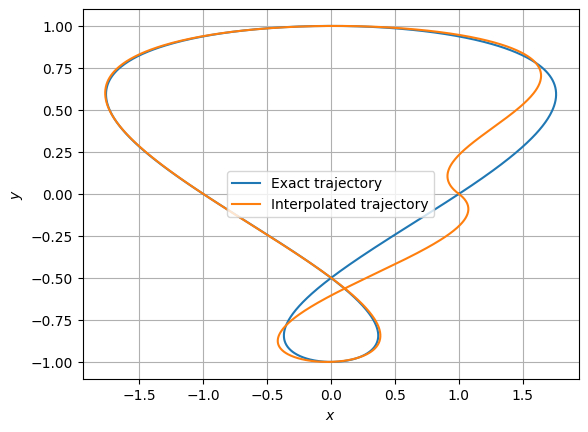

In [11]:
# Compute the exact values
def x(t):
    return np.cos(t) + np.sin(2*t)

def y(t):
    return np.sin(t)

xdata_exact = x(t)
ydata_exact = y(t)

# Plot here both trajectories

plt.plot(xdata_exact, ydata_exact)
plt.plot(p_x, p_y)
plt.legend(['Exact trajectory', 'Interpolated trajectory'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)
plt.show()
